In [2]:
# Let's try to keep the imports in one place this time!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
## Team tracking for Week 5, as a random example.
state_data = pd.read_csv("state_employ.csv")
state_data.head()

,year,month,day,statefips,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70
0,2020,1,14,1,-0.00853,-.00565,-.0125,-.00498,-.00136,-.002,-.0113,-.00742
1,2020,1,14,2,-0.01770,.,.,.,.,.,.,.
2,2020,1,14,4,-0.00659,-.00347,-.00828,-.00611,-.00207,-.00261,-.00736,-.00777
3,2020,1,14,5,-0.00804,-.00944,-.0103,.,.00266,-.0104,.,-.0248
4,2020,1,14,6,-0.00861,-.000604,-.00994,-.00915,-.00396,-.00849,-.0115,-.00788


In [4]:
state_data["date"] = pd.to_datetime(state_data[['year','month','day']])
state_data.head()

,year,month,day,statefips,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70,date
0,2020,1,14,1,-0.00853,-.00565,-.0125,-.00498,-.00136,-.002,-.0113,-.00742,2020-01-14
1,2020,1,14,2,-0.01770,.,.,.,.,.,.,.,2020-01-14
2,2020,1,14,4,-0.00659,-.00347,-.00828,-.00611,-.00207,-.00261,-.00736,-.00777,2020-01-14
3,2020,1,14,5,-0.00804,-.00944,-.0103,.,.00266,-.0104,.,-.0248,2020-01-14
4,2020,1,14,6,-0.00861,-.000604,-.00994,-.00915,-.00396,-.00849,-.0115,-.00788,2020-01-14


In [5]:
FIPS = {
    'AL': 1,
    'AK': 2,
    'AZ': 4,
    'AR': 5,
    'CA': 6,
    'CO': 8,
    'CT': 9,
    'DE': 10,
    'FL': 12,
    'GA': 13,
    'HI': 15,
    'ID': 16,
    'IL': 17,
    'IN': 18,
    'IA': 19,
    'KS': 20,
    'KY': 21,
    'LA': 22,
    'ME': 23,
    'MD': 24,
    'MA': 25,
    'MI': 26,
    'MN': 27,
    'MS': 28,
    'MO': 29,
    'MT': 30,
    'NE': 31,
    'NV': 32,
    'NH': 33,
    'NJ': 34,
    'NM': 35,
    'NY': 36,
    'NC': 37,
    'ND': 38,
    'OH': 39,
    'OK': 40,
    'OR': 41,
    'PA': 42,
    'RI': 44,
    'SC': 45,
    'SD': 46,
    'TN': 47,
    'TX': 48,
    'UT': 49,
    'VT': 50,
    'VA': 51,
    'WA': 53,
    'WV': 54,
    'WI': 55,
    'WY': 56
}

rev_FIPS = dict(map(reversed, FIPS.items()))

In [6]:
state_data['state'] = state_data['statefips'].map(rev_FIPS)

In [7]:
state_data.head()

,year,month,day,statefips,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70,date,state
0,2020,1,14,1,-0.00853,-.00565,-.0125,-.00498,-.00136,-.002,-.0113,-.00742,2020-01-14,AL
1,2020,1,14,2,-0.01770,.,.,.,.,.,.,.,2020-01-14,AK
2,2020,1,14,4,-0.00659,-.00347,-.00828,-.00611,-.00207,-.00261,-.00736,-.00777,2020-01-14,AZ
3,2020,1,14,5,-0.00804,-.00944,-.0103,.,.00266,-.0104,.,-.0248,2020-01-14,AR
4,2020,1,14,6,-0.00861,-.000604,-.00994,-.00915,-.00396,-.00849,-.0115,-.00788,2020-01-14,CA


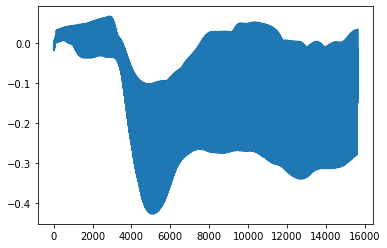

In [8]:
state_data_emp = state_data['emp_combined']
plt.plot(state_data_emp)

In [9]:
import re

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import timedelta, date, datetime

from pandas.plotting import register_matplotlib_converters

In [11]:
cases = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
cases.submission_date = cases.submission_date.apply(lambda x: datetime.strptime(x, '%m/%d/%Y').date())
cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2020-10-15,DC,16166,NaN,NaN,34,0.0,638,NaN,NaN,0,0.0,10/16/2020 01:33:55 PM,NaN,NaN
1,2020-12-08,NM,109947,NaN,NaN,0,0.0,1756,NaN,NaN,0,0.0,12/09/2020 02:45:40 PM,NaN,Not agree
2,2021-01-01,FL,1300528,NaN,NaN,0,6063.0,21673,NaN,NaN,0,7.0,01/02/2021 02:50:51 PM,Not agree,Not agree
3,2020-08-29,SD,12942,NaN,NaN,425,0.0,167,165.0,2.0,2,0.0,08/30/2020 02:49:52 PM,NaN,Agree
4,2020-04-30,IA,7145,NaN,NaN,302,0.0,162,NaN,NaN,14,0.0,05/01/2020 09:00:19 PM,Not agree,Not agree


In [12]:
temp = cases.sort_values(by=['submission_date'])
#temp = temp[(temp['submission_date'] <= datetime.strptime(end + " 2020", '%B %d %Y').date())]
temp.head()
temp.shape

(22800, 15)

In [13]:
temp = temp.rename(columns={"submission_date": "date"})

In [14]:
#state_data['tot_cases'] = temp[temp.state == state_data.state and temp.submission_date == state_data.date].tot_cases
#temo[df['B']==3]['tot_cases']
temp2 = pd.DataFrame.merge(temp,state_data,on='state')
temp2.head()
#new_df = pd.merge(state_data, temp,  how='left', left_on='[state,date]', right_on = '[state,date]')

,date_x,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,year,month,day,statefips,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70,date_y
0,2020-01-22,LA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Agree,2020,1,14,22,-0.00898,-.0114,-.0103,-.00123,-.00356,-.00306,-.0111,-.00399,2020-01-14
1,2020-01-22,LA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Agree,2020,1,15,22,-0.00241,-.00586,-.00371,.00724,.00121,.00318,-.00269,-.000213,2020-01-15
2,2020-01-22,LA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Agree,2020,1,16,22,0.00416,-.00018,.00278,.0157,.00584,.00926,.00587,.0032,2020-01-16
3,2020-01-22,LA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Agree,2020,1,17,22,0.00537,.00147,.00433,.0153,.00582,.00903,.00765,.00453,2020-01-17
4,2020-01-22,LA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Agree,2020,1,18,22,0.00655,.00318,.00578,.0148,.00577,.00872,.00943,.00575,2020-01-18


In [15]:
all_vals = temp2[temp2.date_x == temp2.date_y]
all_vals.head()


,date_x,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,year,month,day,statefips,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70,date_y
8,2020-01-22,LA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Agree,2020,1,22,22,0.0111,.0101,.011,.013,.00534,.00796,.0162,.00757,2020-01-22
316,2020-01-23,LA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Agree,2020,1,23,22,0.0122,.0122,.0122,.0125,.00564,.00807,.018,.00748,2020-01-23
624,2020-01-24,LA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Agree,2020,1,24,22,0.0134,.014,.0134,.0119,.00623,.00835,.0195,.00747,2020-01-24
932,2020-01-25,LA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Agree,2020,1,25,22,0.0143,.0156,.0146,.0113,.00686,.00878,.0201,.00788,2020-01-25
1240,2020-01-26,LA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Agree,2020,1,26,22,0.0151,.0167,.0158,.0107,.00768,.00933,.0204,.00828,2020-01-26


In [16]:
all_vals.shape

(14950, 28)

In [17]:
print(all_vals[all_vals.state == 'WA']['emp_combined'])

3266488    0.0276
3266796    0.0281
3267104    0.0285
3267412    0.0289
3267720    0.0292
            ...  
3357040   -0.0182
3357348   -0.0178
3357656   -0.0176
3357964   -0.0175
3358272   -0.0176
Name: emp_combined, Length: 299, dtype: float64


In [18]:
drop = ['conf_cases',
        'prob_cases',
        'pnew_case',
        'conf_death',
        'prob_death',
        'pnew_death',
        'created_at',
        'consent_cases',
        'consent_deaths',
        'year',
        'month',
        'day',
        'statefips',
        'emp_combined_ss40',
        'emp_combined_ss60',
        'emp_combined_ss65',
        'emp_combined_ss70',
        'date_y']
cases_emp = all_vals.drop(columns = drop)
cases_emp.head()

,date_x,state,tot_cases,new_case,tot_death,new_death,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh
8,2020-01-22,LA,0,0,0,0,0.0111,.0101,.011,.013
316,2020-01-23,LA,0,0,0,0,0.0122,.0122,.0122,.0125
624,2020-01-24,LA,0,0,0,0,0.0134,.014,.0134,.0119
932,2020-01-25,LA,0,0,0,0,0.0143,.0156,.0146,.0113
1240,2020-01-26,LA,0,0,0,0,0.0151,.0167,.0158,.0107


In [19]:
cases_emp = cases_emp.rename(columns={"date_x": "date", "tot_cases_x": "tot_cases"})
cases_emp.head()

,date,state,tot_cases,new_case,tot_death,new_death,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh
8,2020-01-22,LA,0,0,0,0,0.0111,.0101,.011,.013
316,2020-01-23,LA,0,0,0,0,0.0122,.0122,.0122,.0125
624,2020-01-24,LA,0,0,0,0,0.0134,.014,.0134,.0119
932,2020-01-25,LA,0,0,0,0,0.0143,.0156,.0146,.0113
1240,2020-01-26,LA,0,0,0,0,0.0151,.0167,.0158,.0107


In [20]:
pip install PyCausality

     |████████████████████████████████| 194kB 6.2MB/s 
     |████████████████████████████████| 163kB 8.3MB/s 
ERROR: pandas 1.1.5 has requirement python-dateutil>=2.7.3, but you'll have python-dateutil 2.6.1 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement python-dateutil>=2.8.0, but you'll have python-dateutil 2.6.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1


In [21]:
data = cases_emp[['new_case','emp_combined']]
data.reset_index(drop=True, inplace=True)
data.head()

,new_case,emp_combined
0,0,0.0111
1,0,0.0122
2,0,0.0134
3,0,0.0143
4,0,0.0151


In [22]:
from PyCausality.TransferEntropy import *
## Initialise Object to Calculate Transfer Entropy
linear_causality = TransferEntropy(DF = data,
                                   endog = 'new_case',          # Dependent Variable
                                   exog = 'emp_combined',        # Independent Variable
                                   lag = 9)
(lTE_XY, lTE_YX) = linear_causality.linear_TE()
## Display TE_XY, TE_YX and significance values
print(linear_causality.results)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


   TE_linear_XY  TE_linear_YX  ... z_score_linear_XY z_score_linear_YX
0      0.000112      0.008708  ...                 0                 0

[1 rows x 6 columns]


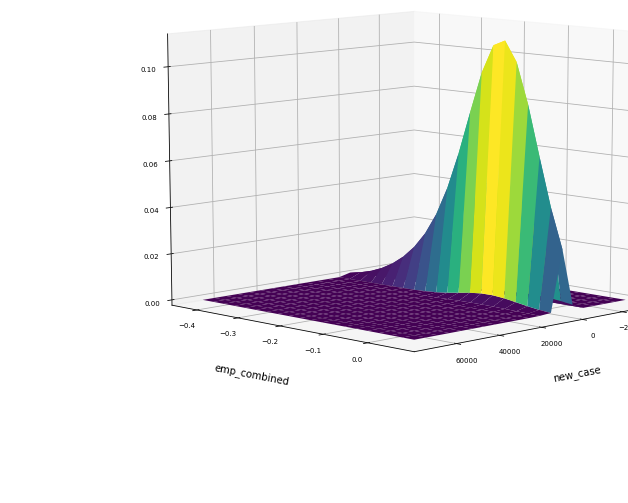

In [61]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox

from PyCausality.TransferEntropy import *
from PyCausality.Testing.Test_Utils.Time_Series_Generate import *

## Set Parameters
LAG = 9
SIMILARITY = 0            # Choose value between 0 (independent) to 1 (exact lagged value)
AUTOSIMILARITY = 0        # Choose value between 0 (independent) to 1 (exact lagged value)
SEED = None                 # Change pseudo-RNG seed; useful for repeat results & comparing bin choices
DATA_POINTS = 500
BANDWIDTH = 0.8           # Choose bandwidth for KDE
N_BINS = 15

bins = {'new_case':np.linspace(data['new_case'].min(),data['new_case'].max(),N_BINS),
         'emp_combined':np.linspace(data['emp_combined'].min(),data['emp_combined'].max(),N_BINS)}

## Generate plots of the probability distribution. These are returned as axes objects
hist_axis = plot_pdf(df=data[['new_case','emp_combined']],estimator='histogram', bins=bins, cmap='viridis',show=False)
kernel_axis = plot_pdf(df=data[['new_case','emp_combined']],estimator='kernel', bandwidth=BANDWIDTH, cmap='viridis', show=False)

## Strip the returned axes objects and apply them to subplots
fig, axes = plt.subplots(nrows=0,ncols=0,figsize=(16,11))

kernel_axis.figure = fig
hist_axis.figure= fig
AXES = [hist_axis, kernel_axis]
fig.axes.append(AXES)
[fig.add_axes(ax) for ax in AXES]
plt.rcParams["figure.figsize"] = (10,9)
plt.show()